In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array 

In [2]:
df = pd.read_csv('/content/drive/MyDrive/train2/train_labels_.csv')

In [ ]:
df.head()

filename  width  height    class  xmin  ymin  xmax  ymax
0    Cars0.png    500     268  licence   226   125   419   173
1    Cars1.png    400     248  licence   134   128   262   160
2   Cars10.png    400     225  licence   140     5   303   148
3  Cars100.png    400     267  licence   175   114   214   131
4  Cars101.png    400     300  licence   167   202   240   220

In [ ]:
img = cv2.imread('/content/drive/MyDrive/tensorflow/train/1.jpg')


In [ ]:
# Code for plotting bounding box
def plot_bbox(img_id):
  #img_url = images_boxable.loc[images_boxable["ImageID"]==img_id]['OriginalURL'].values[0]
  img = cv2.imread('/content/drive/MyDrive/train2/train/'+img_id)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = df[df['filename']==img_id]
  for index, row in bboxs.iterrows():
      xmin = row['xmin']
      xmax = row['xmax']
      ymin = row['ymin']
      ymax = row['ymax']
      #xmin = int(xmin*width)
      #xmax = int(xmax*width)
      #ymin = int(ymin*height)
      #ymax = int(ymax*height)
      label_name = 'num_plate'
      #class_series = class_descriptions[class_descriptions[0]==label_name]
      class_name = 'liscence_plate'
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (255,0,0), 5)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")

Image: (270, 471, 3)
Coordinates: (146, 118), (311, 170)
Image: (300, 400, 3)
Coordinates: (42, 131), (202, 243)
Image: (268, 400, 3)
Coordinates: (192, 146), (242, 167)
Image: (353, 400, 3)
Coordinates: (189, 193), (352, 248)
Image: (292, 400, 3)
Coordinates: (129, 260), (232, 290)


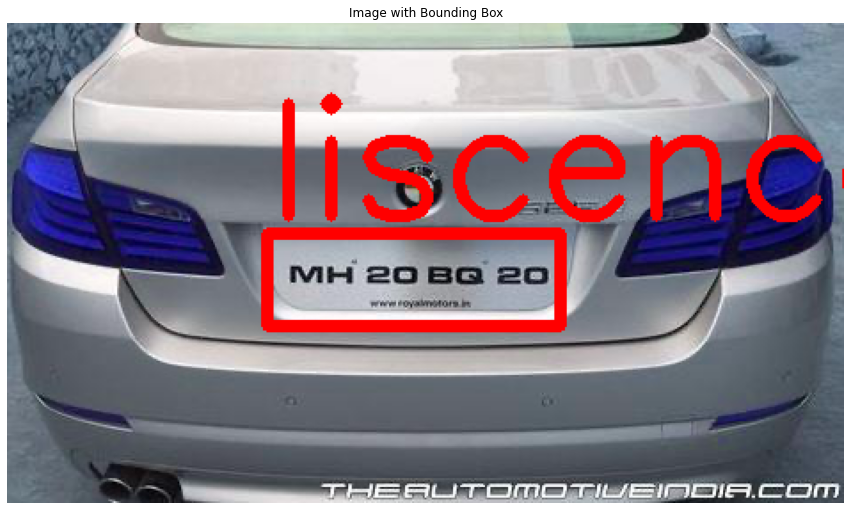

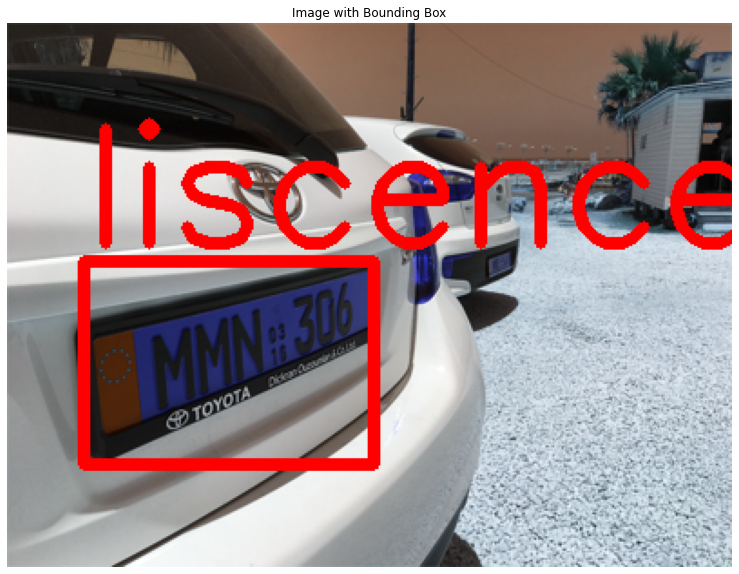

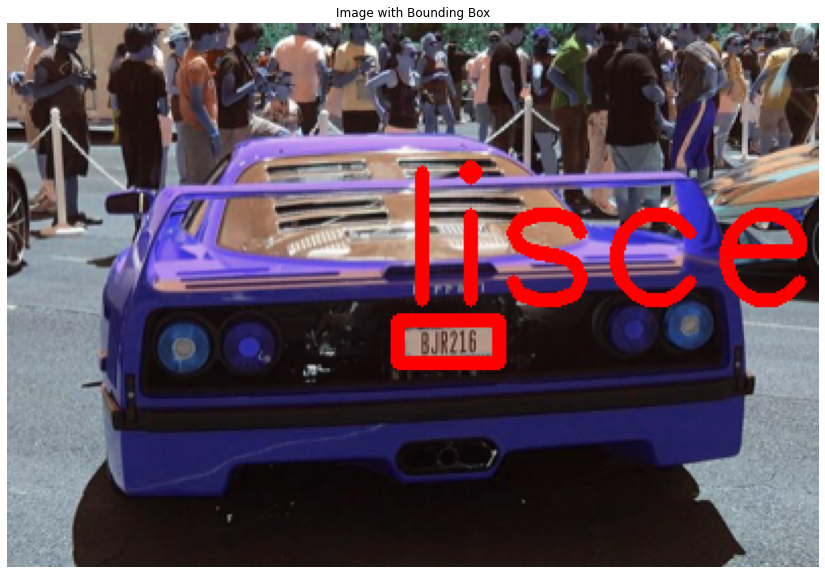

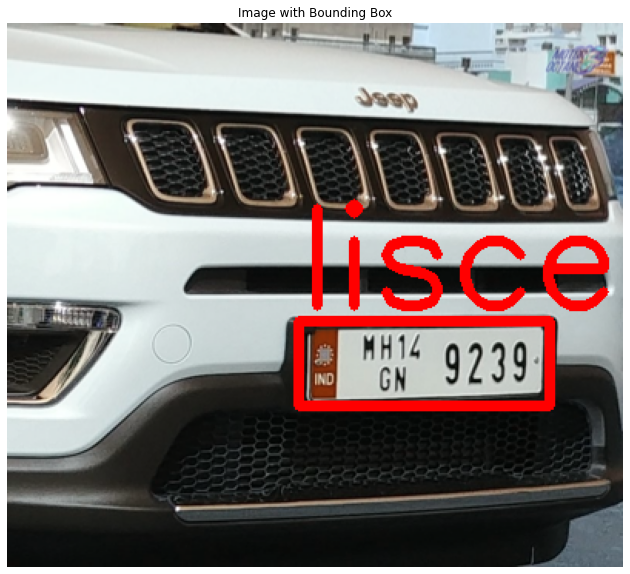

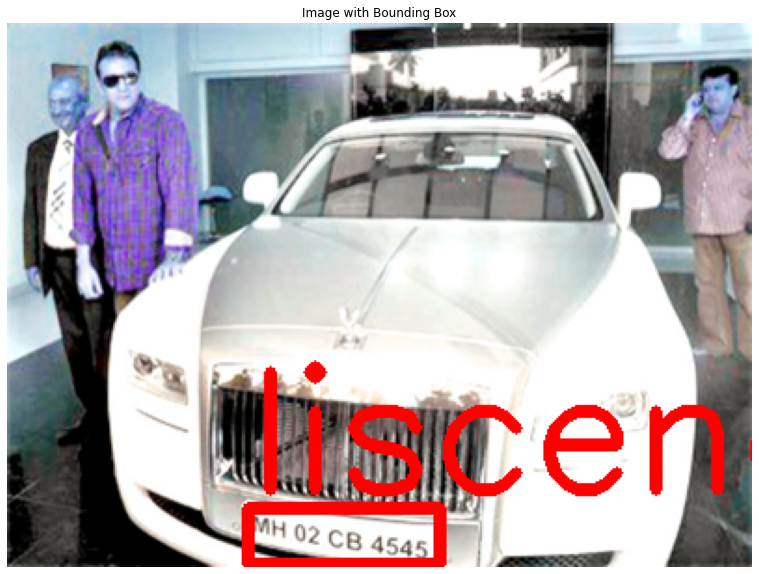

In [ ]:

least_objects_img_ids = df["filename"].value_counts().tail(50).index.values

for img_id in random.sample(list(least_objects_img_ids), 5):
  plot_bbox(img_id)

#Preproceesing

path = '/content/drive/MyDrive/tensorflow/train' 
files = os.listdir(path)

files_txt = [i for i in files if i.endswith('.jpg')]

In [ ]:
path = '/content/drive/MyDrive/train2/train' 

In [ ]:
files_txt = [i for i in df['filename']]

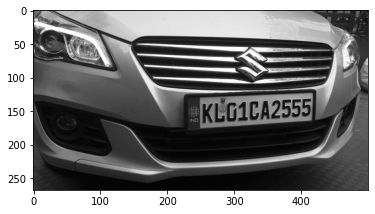

In [ ]:
#converting all images to gray scale
#so that we have only 1 layer and less information to process

for img in files_txt:  # iterate over each image per dogs and cats
  img_array = cv2.imread(os.path.join(path,img))  # convert to array
  img_array =  cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
  plt.imshow(img_array, cmap='gray')  # graph it
  plt.show()  # display!
  break

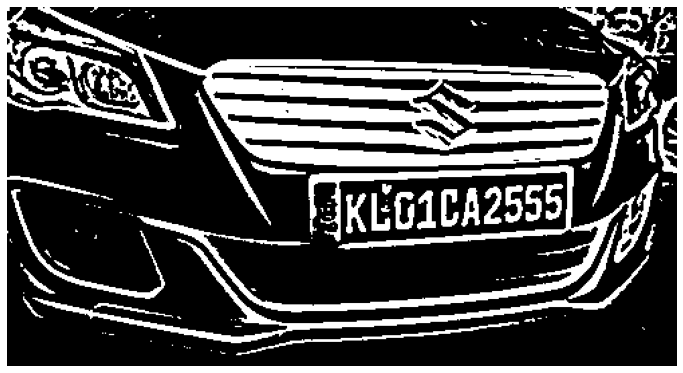

In [ ]:
#this code block is for a single image
#maximize contrast
img = 'Cars0.png'
img_array = cv2.imread(os.path.join(path,img))  # convert to array
img_array =  cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY) # convert to gray scale
#image processing
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgTopHat = cv2.morphologyEx(img_array, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(img_array, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(img_array, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

#Thresholding

img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)


plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')
plt.axis('off')
plt.savefig('Car-Adaptive-Thresholding.png',bbox_inches = 'tight')
plt.show()

In [ ]:
img_thresh.shape

(268, 500)

In [ ]:
'''converting all images to gray scale and preprocessing them and then resizing'''
#later appending all images to a list
training_data = []
IMG_SIZE = 250
for img in files_txt:
  img_array = cv2.imread(os.path.join(path,img))  # convert to array
  img_array =  cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
  structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
  imgTopHat = cv2.morphologyEx(img_array, cv2.MORPH_TOPHAT, structuringElement)
  imgBlackHat = cv2.morphologyEx(img_array, cv2.MORPH_BLACKHAT, structuringElement)

  imgGrayscalePlusTopHat = cv2.add(img_array, imgTopHat)
  gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

  #Thresholding

  img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

  img_thresh = cv2.adaptiveThreshold(
      img_blurred, 
      maxValue=255.0, 
      adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
      thresholdType=cv2.THRESH_BINARY_INV, 
      blockSize=19, 
      C=9)
  new_array = cv2.resize(img_thresh, (224, 224))  # resize image
  training_data.append(new_array)  # add this to our training_data

In [ ]:
#same as above code block but resizing the image to different value
training_data2 = []
IMG_SIZE = 224
for img in files_txt:
  image = cv2.imread(os.path.join(path,img))  # convert to array
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  smooth = cv2.bilateralFilter(gray, 9, 75, 75)
  edge = cv2.Canny(smooth, 70, 400)

  contours, new = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  image_copy = image.copy()

  _ = cv2.drawContours(image_copy, contours, -1, (255, 0, 0), 2)

  contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]

  image_reduced = edge.copy()
  _ = cv2.drawContours(image_reduced, contours, -1, (255, 0, 0), 2)

  new_array = cv2.resize(image_reduced, (224, 224))  # resize image
  training_data2.append(new_array)  # add this to our training_data

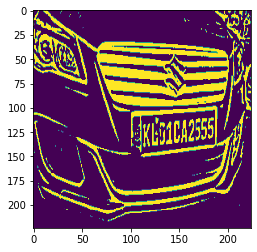

In [ ]:
#plotting image from numpy array
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(training_data[0], interpolation='nearest')
plt.show()


#Scaling bounding box dimensions

Firstly I collected all the images and have drawn bounding boxes using a tool LabelBox and created xml file for each image and later created the following file from all xml files.

The file below contains all bouding box co-ordinates as well as height and width of images

In [ ]:
df.head()

filename  width  height    class  xmin  ymin  xmax  ymax
0    Cars0.png    500     268  licence   226   125   419   173
1    Cars1.png    400     248  licence   134   128   262   160
2   Cars10.png    400     225  licence   140     5   303   148
3  Cars100.png    400     267  licence   175   114   214   131
4  Cars101.png    400     300  licence   167   202   240   220

In [3]:
df1 = df.copy()#making a copy

In [4]:
#creating the following new columns
df['xmin_norm'] = ''
df['ymin_norm'] = ''
df['xmax_norm'] = ''
df['ymax_norm'] = ''

In [8]:
#need to scale down bounding boxes as we have resized the images
for i in range(df1.shape[0]):
  df['xmin_norm'][i] = float(df.xmin[i]) / df.width[i]
  df['ymin_norm'][i] = float(df.ymin[i]) / df.height[i]
  df['xmax_norm'][i] = float(df.xmax[i]) / df.width[i]
  df['ymax_norm'][i] = float(df.ymax[i]) / df.height[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [6]:
df.head()

filename  width  height    class  ...  xmin_norm  ymin_norm  xmax_norm  ymax_norm
0    Cars0.png    500     268  licence  ...      0.452   0.466418      0.838   0.645522
1    Cars1.png    400     248  licence  ...      0.335   0.516129      0.655   0.645161
2   Cars10.png    400     225  licence  ...       0.35  0.0222222     0.7575   0.657778
3  Cars100.png    400     267  licence  ...     0.4375   0.426966      0.535   0.490637
4  Cars101.png    400     300  licence  ...     0.4175   0.673333        0.6   0.733333

[5 rows x 12 columns]

#next

In [ ]:
len(training_data)#total of 471 images

471

In [ ]:
training_data[0].shape

(224, 224)

In [ ]:
X = np.array(training_data).reshape(-1, 224, 224,1)#train data--converting to array for input to cnn

In [ ]:
X[0].shape

(224, 224, 1)

#Next

In [ ]:
df.head(2)

filename  width  height    class  ...  xmin_norm  ymin_norm  xmax_norm  ymax_norm
0  Cars0.png    500     268  licence  ...      0.452   0.466418      0.838   0.645522
1  Cars1.png    400     248  licence  ...      0.335   0.516129      0.655   0.645161

[2 rows x 12 columns]

#Train test data

In [ ]:

targets = []
filenames = []

In [ ]:
targets = []
for i in range(df.shape[0]):
  targets.append((df['xmin_norm'][i],df['ymin_norm'][i],df['xmax_norm'][i],df['ymax_norm'][i]))

In [ ]:
targets #our model will be trained on these targets

[(0.452, 0.4664179104477612, 0.838, 0.6455223880597015),
 (0.335, 0.5161290322580645, 0.655, 0.6451612903225806),
 (0.35, 0.022222222222222223, 0.7575, 0.6577777777777778),
 (0.4375, 0.42696629213483145, 0.535, 0.49063670411985016),
 (0.4175, 0.6733333333333333, 0.6, 0.7333333333333333),
 (0.18857142857142858, 0.55893536121673, 0.92, 0.7566539923954373),
 (0.575, 0.6581632653061225, 0.62, 0.6836734693877551),
 (0.4725, 0.5918367346938775, 0.505, 0.6173469387755102),
 (0.39, 0.7112299465240641, 0.488, 0.7540106951871658),
 (0.38, 0.6125, 0.515, 0.6625),
 (0.345, 0.31983805668016196, 0.4425, 0.3724696356275304),
 (0.6125, 0.31983805668016196, 0.675, 0.3805668016194332),
 (0.4225, 0.8178137651821862, 0.48, 0.9352226720647774),
 (0.5625, 0.7854251012145749, 0.6975, 0.8785425101214575),
 (0.29936305732484075,
  0.4185185185185185,
  0.6602972399150743,
  0.6074074074074074),
 (0.3574660633484163,
  0.6486486486486487,
  0.6266968325791855,
  0.7447447447447447),
 (0.2875, 0.4344569288389513

In [ ]:
filenames = []
for i in range(df.shape[0]):
  filenames.append((df['filename'][i]))

In [ ]:
filenames # names of all our images

['Cars0.png',
 'Cars1.png',
 'Cars10.png',
 'Cars100.png',
 'Cars101.png',
 'Cars102.png',
 'Cars103.png',
 'Cars103.png',
 'Cars104.png',
 'Cars105.png',
 'Cars106.png',
 'Cars106.png',
 'Cars106.png',
 'Cars106.png',
 'Cars107.png',
 'Cars108.png',
 'Cars109.png',
 'Cars11.png',
 'Cars110.png',
 'Cars111.png',
 'Cars112.png',
 'Cars113.png',
 'Cars114.png',
 'Cars115.png',
 'Cars116.png',
 'Cars117.png',
 'Cars118.png',
 'Cars119.png',
 'Cars12.png',
 'Cars120.png',
 'Cars121.png',
 'Cars122.png',
 'Cars123.png',
 'Cars124.png',
 'Cars125.png',
 'Cars126.png',
 'Cars127.png',
 'Cars128.png',
 'Cars129.png',
 'Cars13.png',
 'Cars130.png',
 'Cars131.png',
 'Cars132.png',
 'Cars132.png',
 'Cars133.png',
 'Cars134.png',
 'Cars135.png',
 'Cars136.png',
 'Cars137.png',
 'Cars138.png',
 'Cars139.png',
 'Cars139.png',
 'Cars14.png',
 'Cars140.png',
 'Cars141.png',
 'Cars142.png',
 'Cars143.png',
 'Cars143.png',
 'Cars144.png',
 'Cars145.png',
 'Cars146.png',
 'Cars146.png',
 'Cars146.png',
 

In [ ]:
X_norm = np.array(X, dtype="float32") / 255.0  #normalising as pixel ranges from 0 to 255
targets = np.array(targets, dtype="float32")

#train test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
split = train_test_split(X_norm, targets, filenames, test_size=0.10,random_state=42)

In [ ]:
# unpack the data split
(trainImages, testImages) = split[:2]
(trainTargets, testTargets) = split[2:4]
(trainFilenames, testFilenames) = split[4:]


#training

In [ ]:
import random
import pprint
import sys
import time
import numpy as np
from optparse import OptionParser
import pickle
import math
import cv2
import copy
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import os

from sklearn.metrics import average_precision_score

from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, TimeDistributed
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.objectives import categorical_crossentropy

from keras.models import Model
from keras.utils import generic_utils
from keras.engine import Layer, InputSpec
from keras import initializers, regularizers

In [ ]:
from keras.layers import Concatenate

In [ ]:
from tensorflow.keras.applications import VGG16
# load the VGG16 network, ensuring the head FC layers are left off

# load model and specify a new input shape for images
img_input = Input(shape=(224, 224, 1))
img_conc = Concatenate()([img_input, img_input, img_input])
vgg = VGG16(weights="imagenet", include_top=False,
	input_tensor=img_conc)
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)
# construct a fully-connected layer header to output the predicted
# bounding box coordinates
bbHead = Dense(128, activation="relu")(flatten)
bbHead = Dense(128, activation="relu")(bbHead)
#bboxHead = Dropout(0.5)(bboxHead)#dropout layer
#bbHead = Dense(128, activation="relu")(bbHead)
#bboxHead = Dropout(0.5)(bboxHead)#dropout layer
#bbHead = Dense(64, activation="relu")(bbHead)
bbHead = Dense(64, activation="relu")(bbHead)
bbHead = Dense(4, activation="sigmoid")(bbHead)
# construct the model we will fine-tune for bounding box regression
model = Model(inputs=vgg.input, outputs=bbHead)

In [ ]:
optimizer = Adam(lr=1e-5)
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
H = model.fit(
	trainImages, trainTargets,
	validation_data=(testImages, testTargets),
	batch_size=32,
	epochs=50,
	verbose=1)

Epoch 1/50
14/14 [==============================] - 4s 264ms/step - loss: 0.0061 - accuracy: 0.9243 - val_loss: 0.0168 - val_accuracy: 0.8125
Epoch 2/50
14/14 [==============================] - 4s 262ms/step - loss: 0.0060 - accuracy: 0.9125 - val_loss: 0.0162 - val_accuracy: 0.7708
Epoch 3/50
14/14 [==============================] - 4s 261ms/step - loss: 0.0062 - accuracy: 0.9054 - val_loss: 0.0168 - val_accuracy: 0.8125
Epoch 4/50
14/14 [==============================] - 4s 262ms/step - loss: 0.0062 - accuracy: 0.9078 - val_loss: 0.0167 - val_accuracy: 0.7708
Epoch 5/50
14/14 [==============================] - 4s 259ms/step - loss: 0.0063 - accuracy: 0.9054 - val_loss: 0.0165 - val_accuracy: 0.7708
Epoch 6/50
14/14 [==============================] - 4s 261ms/step - loss: 0.0063 - accuracy: 0.8913 - val_loss: 0.0165 - val_accuracy: 0.7500
Epoch 7/50
14/14 [==============================] - 4s 261ms/step - loss: 0.0062 - accuracy: 0.9007 - val_loss: 0.0165 - val_accuracy: 0.7708
Epoch 

In [ ]:
# saving our model to json
# serialize model to JSON
model_json = model2.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("cnn_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#saving model to drive
import shutil, os
files = ['cnn_model.json', 'cnn_model.h5']
for f in files:
    shutil.copy(f, '/content/drive/MyDrive')

In [ ]:
# plot the model training history
N = 100#number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
#plt.savefig(config.PLOT_PATH)

In [ ]:
def predict(img_num):  
  # make bounding box predictions on the input image
  preds =model.predict(testImages)[img_num]
  (startX, startY, endX, endY) = preds
  # load the input image (in OpenCV format), resize it such that it
  # fits on our screen, and grab its dimensions
  path = '/content/drive/MyDrive/train2/train'
  imagePath = path+'/'+testFilenames[img_num]
  image = cv2.imread(imagePath)
  print(testFilenames[img_num])
  #image = cv2.resize(image, (250,250))
  (h, w) = image.shape[:2]
  # scale the predicted bounding box coordinates based on the image
  # dimensions
  startX = int(startX * w)
  startY = int(startY * h)
  endX = int(endX * w)
  endY = int(endY * h)
  # draw the predicted bounding box on the image
  cv2.rectangle(image, (startX, startY), (endX, endY),
    (255, 0, 0), 5)
  # show the output image
  plt.imshow(image)
  return startX,startY,endX,endY
  #cv2.waitKey(0)

Cars46.png


(203, 192, 353, 254)

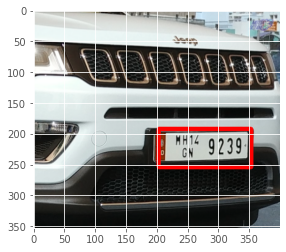

In [ ]:
predict(12)

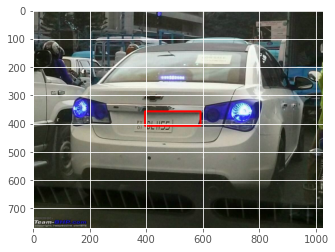

In [ ]:

img = '11.jpg'
path = '/content/drive/MyDrive/tensorflow/train'
img_array = cv2.imread(os.path.join(path,img))  # convert to array
img_gray =  cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgTopHat = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(img_gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

#Thresholding

img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)
#plt.imshow(img_thresh)

#-------------------------------
new_array = cv2.resize(img_thresh, (224, 224))  # resize image
X = np.array(new_array).reshape(-1, 224, 224,1)/255.0#train data--converting to array for input to cnn
#X_norm = np.array(X, dtype="float32") /255.0  #normalising as pixel ranges from 0 to 255


#------------------------------
# make bounding box predictions on the input image
preds = model.predict(X)[0]
(startX, startY, endX, endY) = preds
# load the input image (in OpenCV format), resize it such that it
# fits on our screen, and grab its dimensions
#imagePath = path+'/'+testFilenames[23]
#image = cv2.imread(imagePath)
#image = cv2.resize(image, (250,250))
(h, w) = img_array.shape[:2]
# scale the predicted bounding box coordinates based on the image
# dimensions
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
# draw the predicted bounding box on the image
cv2.rectangle(img_array, (startX, startY), (endX, endY),
  (255, 0, 0), 5)
# show the output image
plt.imshow(img_array)
plt.grid('off')
#cv2.waitKey(0)

In [ ]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if interArea == 0:
        return 0
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))


    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [ ]:
#IOU
def IOU(img_num):

  bboxs = df[df['filename']==testFilenames[img_num]]
  for index, row in bboxs.iterrows():

      xmin = int(np.round(row['xmin']))
      ymin = int(np.round(row['ymin']))
      xmax = int(np.round(row['xmax']))
      ymax = int(np.round(row['ymax']))

  startX, startY, endX, endY = predict(img_num)
  boxA = [xmin, ymin, xmax, ymax]
  boxB = [startX, startY, endX, endY]

  correct = bb_intersection_over_union(boxA, boxB)
  print('IOU:',correct)
  #==================================
  path = '/content/drive/MyDrive/train2/train'
  imagePath = path+'/'+testFilenames[img_num]
  image = cv2.imread(imagePath)
  cv2.rectangle(image, (startX, startY), (endX, endY),
    (255, 0, 0), 5)
  cv2.rectangle(image, (xmin, ymin), (xmax, ymax),(0, 255, 0), 5)
  # show the output image
  plt.imshow(image)

  #====================================



Cars284.png
IOU: 0.616088694082764


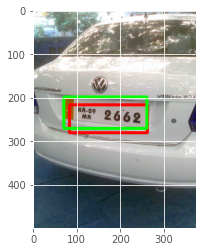

In [ ]:
IOU(5) # evaluation metric i.e Intersection over Union

#<center>**2nd Model**

In [ ]:
    img_rows, img_cols = 224, 224   # by default size is 224,224
    img_channels = 1

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    print(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
    print(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
    print(x)

    # Block 4
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
    print(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    #-----------------------------------------------------
    # Block 6
    x = Conv2D(640, (3, 3), activation='relu', padding='same', name='block6_conv1')(x)
    x = Conv2D(640, (3, 3), activation='relu', padding='same', name='block6_conv2')(x)
    x = Conv2D(640, (3, 3), activation='relu', padding='same', name='block6_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block6_pool')(x)
    # Block 7

    x = Conv2D(640, (3, 3), activation='relu', padding='same', name='block7_conv1')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block7_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block7_pool')(x)



    #---------------------------------------------------------



    # Flatten the convlutional layer and connected to 2 FC and 2 dropout
    flatten = Flatten(name='flatten')(x) #expanded into a vector with 25,088 (7×7×512) channels.
    bboxHead = Dense(512, activation="relu")(flatten)
    bboxHead = Dropout(0.5)(bboxHead)
    bboxHead = Dense(256, activation="relu")(bboxHead)
    #bboxHead = Dropout(0.5)(bboxHead)
    bboxHead = Dense(128, activation="relu")(bboxHead)
    bboxHead = Dense(64, activation="relu")(bboxHead)
    bboxHead = Dense(32, activation="relu")(bboxHead)
    bboxHead = Dense(4, activation="sigmoid")(bboxHead)
    #out = Dense(4096, activation='relu', name='fc1')(out)
    #out = Dropout(0.5)(out)
    #out = Dense(4096, activation='relu', name='fc2')(out)
    #out = Dropout(0.5)(out)
    


KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 64), dtype=tf.float32, name=None), name='block1_pool/MaxPool:0', description="created by layer 'block1_pool'")
KerasTensor(type_spec=TensorSpec(shape=(None, 56, 56, 128), dtype=tf.float32, name=None), name='block2_pool/MaxPool:0', description="created by layer 'block2_pool'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 256), dtype=tf.float32, name=None), name='block3_pool/MaxPool:0', description="created by layer 'block3_pool'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 256), dtype=tf.float32, name=None), name='block4_pool/MaxPool:0', description="created by layer 'block4_pool'")


In [ ]:
model2 = Model(inputs=img_input, outputs=bboxHead)

In [ ]:
print(model2.summary())

In [ ]:
optimizer = Adam(lr=1e-6)
model2.compile(loss=['mse'],optimizer=optimizer,metrics=['accuracy'])

In [ ]:
H2 = model2.fit(
	trainImages, trainTargets,
	validation_data=(testImages, testTargets),
	batch_size=32,
	epochs=50,
	verbose=1)

In [ ]:
# serialize model to JSON
model_json = model2.to_json()
with open("500_epochs2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("500_epochs2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#saving model to drive
import shutil, os
files = ['500_epochs2.json', '500_epochs2.h5']
for f in files:
    shutil.copy(f, '/content/drive/MyDrive')

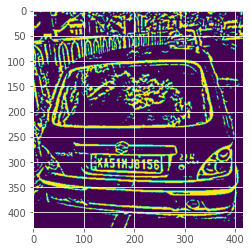

In [ ]:
img = '5.jpg'
path = '/content/drive/MyDrive/tensorflow/train'
img_array = cv2.imread(os.path.join(path,img))  # convert to array
img_gray =  cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgTopHat = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(img_gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

#Thresholding

img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)
plt.imshow(img_thresh)

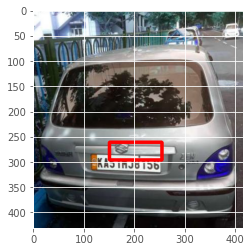

In [ ]:

new_array = cv2.resize(img_thresh, (224, 224))  # resize image
X = np.array(new_array).reshape(-1, 224, 224,1)/255.0#train data--converting to array for input to cnn
#X_norm = np.array(X, dtype="float32") /255.0  #normalising as pixel ranges from 0 to 255


#------------------------------
# make bounding box predictions on the input image
preds = model2.predict(X)[0]
(startX, startY, endX, endY) = preds
# load the input image (in OpenCV format), resize it such that it
# fits on our screen, and grab its dimensions
#imagePath = path+'/'+testFilenames[23]
#image = cv2.imread(imagePath)
#image = cv2.resize(image, (250,250))
(h, w) = img_array.shape[:2]
# scale the predicted bounding box coordinates based on the image
# dimensions
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
# draw the predicted bounding box on the image
cv2.rectangle(img_array, (startX, startY), (endX, endY),
  (255, 0, 0), 5)
# show the output image
plt.imshow(img_array)
plt.grid('off')
#cv2.waitKey(0)

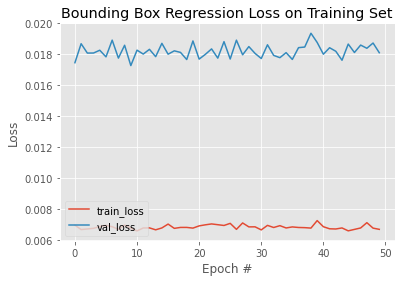

In [ ]:
# plot the model training history
N = 50#number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H2.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
#plt.savefig(config.PLOT_PATH)

#Prediction2


In [ ]:
def predict2(img_num):  
  # make bounding box predictions on the input image
  preds =model2.predict(testImages)[img_num]
  (startX, startY, endX, endY) = preds
  # load the input image (in OpenCV format), resize it such that it
  # fits on our screen, and grab its dimensions
  path = '/content/drive/MyDrive/train2/train'
  imagePath = path+'/'+testFilenames[img_num]
  image = cv2.imread(imagePath)
  print(testFilenames[img_num])
  #image = cv2.resize(image, (250,250))
  (h, w) = image.shape[:2]
  # scale the predicted bounding box coordinates based on the image
  # dimensions
  startX = int(startX * w)
  startY = int(startY * h)
  endX = int(endX * w)
  endY = int(endY * h)
  # draw the predicted bounding box on the image
  cv2.rectangle(image, (startX, startY), (endX, endY),
    (255, 0, 0), 5)
  # show the output image
  plt.imshow(image)
  return startX,startY,endX,endY
  #cv2.waitKey(0)

Cars3.png


(148, 130, 254, 156)

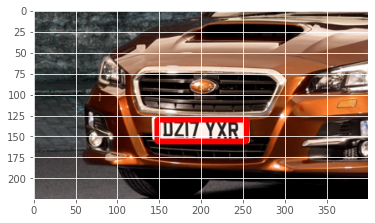

In [ ]:
predict2(23)

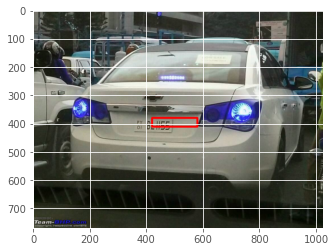

In [ ]:

img = '11.jpg'
path = '/content/drive/MyDrive/tensorflow/train'
img_array = cv2.imread(os.path.join(path,img))  # convert to array
img_gray =  cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgTopHat = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(img_gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

#Thresholding

img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)
#plt.imshow(img_thresh)

#-------------------------------
new_array = cv2.resize(img_thresh, (224, 224))  # resize image
X = np.array(new_array).reshape(-1, 224, 224,1)/255.0#train data--converting to array for input to cnn
#X_norm = np.array(X, dtype="float32") /255.0  #normalising as pixel ranges from 0 to 255


#------------------------------
# make bounding box predictions on the input image
preds = model2.predict(X)[0]
(startX, startY, endX, endY) = preds
# load the input image (in OpenCV format), resize it such that it
# fits on our screen, and grab its dimensions
#imagePath = path+'/'+testFilenames[23]
#image = cv2.imread(imagePath)
#image = cv2.resize(image, (250,250))
(h, w) = img_array.shape[:2]
# scale the predicted bounding box coordinates based on the image
# dimensions
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
# draw the predicted bounding box on the image
cv2.rectangle(img_array, (startX, startY), (endX, endY),
  (255, 0, 0), 5)
# show the output image
plt.imshow(img_array)
plt.grid('off')
#cv2.waitKey(0)

In [ ]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if interArea == 0:
        return 0
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))


    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [ ]:
#IOU
def IOU(img_num):

  bboxs = df[df['filename']==testFilenames[img_num]]
  for index, row in bboxs.iterrows():

      xmin = int(np.round(row['xmin']))
      ymin = int(np.round(row['ymin']))
      xmax = int(np.round(row['xmax']))
      ymax = int(np.round(row['ymax']))

  startX, startY, endX, endY = predict2(img_num)
  boxA = [xmin, ymin, xmax, ymax]
  boxB = [startX, startY, endX, endY]

  correct = bb_intersection_over_union(boxA, boxB)
  print('IOU:',correct)
  #==================================
  path = '/content/drive/MyDrive/train2/train'
  imagePath = path+'/'+testFilenames[img_num]
  image = cv2.imread(imagePath)
  cv2.rectangle(image, (startX, startY), (endX, endY),
    (255, 0, 0), 5)
  cv2.rectangle(image, (xmin, ymin), (xmax, ymax),(0, 255, 0), 5)
  # show the output image
  plt.imshow(image)

  #====================================


Cars18.png
IOU: 0.5563282336578581


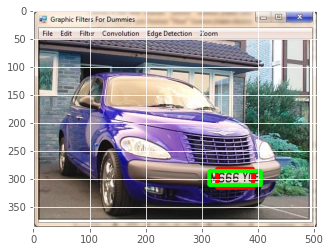

In [ ]:
IOU(32)